[0.003337824774623213, 0.9632732732449317, 0.9445430816429295, 0.005224665422629738, 0.008558370112268775]
[4.929826211262461, 19.300336571922198, 0.23388943571590207, 0.48135741799921056, 0.5392656781344832]


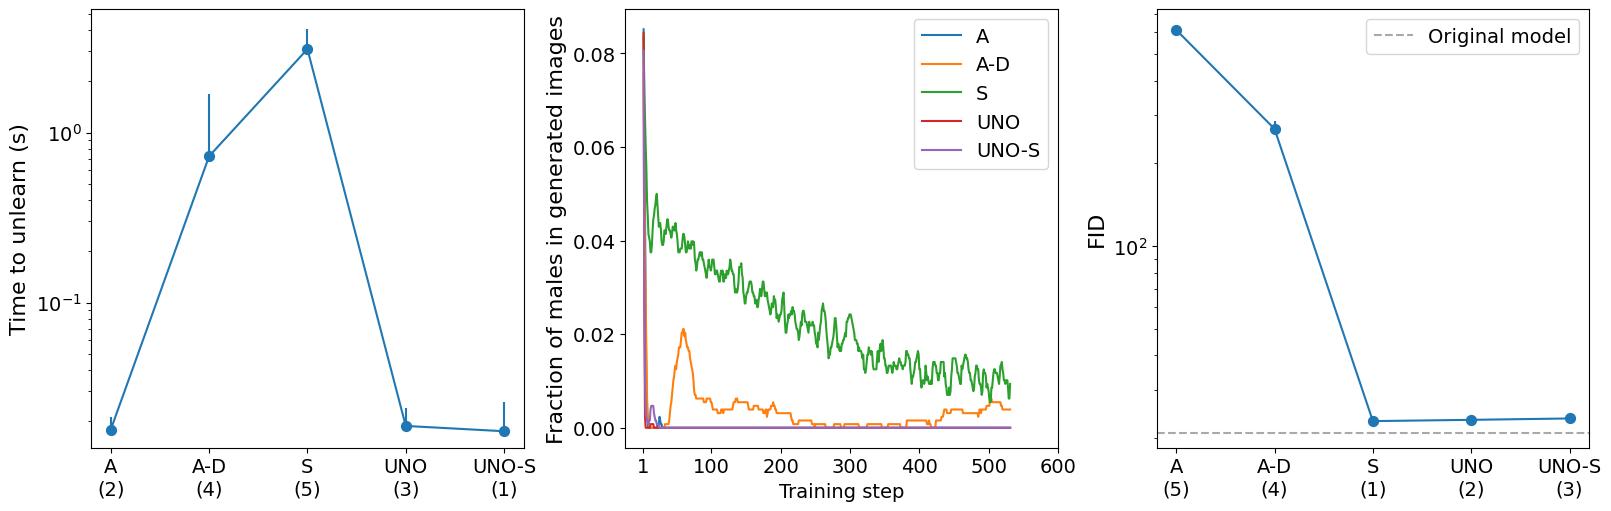

In [13]:
import os, sys, torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../../modules'))
sys.path.append(os.path.abspath('../../modules/mnist'))
import vae_train as vt
import vae_ortho as vo
import vae_surgery as vs
import vae_os as vos
import vae_ascent as va
import vae_ad as vad
import classifier as cl
import batch as bt
import utility as ut
import vae_viz as viz
import datapipe


device = ut.get_device()
root = '../../data/MNIST/MNIST-Experiments'
mnist_folder = '../../data/MNIST'

algorithms = {"folders": [], "labels": [], }

algorithms["folders"].append(f"{root}/vae-a")
algorithms["labels"].append("A")

algorithms["folders"].append(f"{root}/vae-ad")
algorithms["labels"].append("A-D")

# algorithms["folders"].append(f"{root}/vae-hat")
# algorithms["labels"].append(r"$\hat{.}$")

algorithms["folders"].append(f"{root}/vae-s")
algorithms["labels"].append("S")

# algorithms["folders"].append(f"{root}/vae-shat")
# algorithms["labels"].append(r"$\hat{S}$")

algorithms["folders"].append(f"{root}/vae-o")
algorithms["labels"].append(r"UNO")

# algorithms["folders"].append(f"{root}/vae-ohat")
# algorithms["labels"].append(r"$\hat{O}$")

algorithms["folders"].append(f"{root}/vae-os")
algorithms["labels"].append(r"UNO-S")

# algorithms["folders"].append(f"{root}/vae-ohatshat")
# algorithms["labels"].append(r"$\hat{O}\hat{S}$")

bc = bt.BatchCompare(algorithms["folders"], algorithms["labels"])
# bc.plot("8 Fraction", "3 Fraction")
bc.plot2(logs=[1, True], rank=True)
plt.savefig("../../plots/mnist.pdf")#, bbox_inches="tight")

In [20]:
path_a = f'{root}/vae-o/expr-0/checkpoints/vae_epoch_1.pth'#f'{mnist_folder}/vae/vae_200.pth'
path_b = f'{root}/vae-o/expr-0/checkpoints/vae_epoch_2.pth'
model_a = vt.init_model(path_a, 2, 'mps')
model_b = vt.init_model(path_b, 2, 'mps')
model_a.to('mps')
viz.compare_generated_samples(model_a, model_b, num_samples=100)

AssertionError: Torch not compiled with CUDA enabled